### Описание

Метод Оцу ищет порог, уменьшающий дисперсию внутри класса, которая определяется как взвешенная сумма дисперсий двух классов:
<center>$\delta^2_\omega(t) = \omega_1(t) \delta^2_1(t) + \omega_2(t) \delta^2_2(t)$</center>
где веса $\omega_i$ — это вероятности двух классов, разделенных порогом t,
$\delta^2_i$ — дисперсия этих классов

Оцу показал, что минимизация дисперсии внутри класса равносильна максимизации дисперсии между классами:
<center>$\delta^2_b(t) = \delta^2 - \delta^2_\omega(t) = \omega_1(t) \omega_2(t)[\mu_1(t) - \mu_2(t)]^2$</center>

которая выражается в терминах вероятности $\omega_i$ и среднего арифметического класса $\mu_i$, которое, в свою очередь, может обновляться итеративно. Эта идея привела к эффективному алгоритму.

### Алгоритм

Пусть дано монохромное изображение $G(i, j), i = \overline{1,Height} , j = \overline{1,Width}$ <br>
Счетчик повторений $k=0$
1. Вычислить гистограмму $p(l)$ изображения и частоту $N(l)$ для каждого уровня интенсивности изображения $G$.
2. Вычислить начальные значения для $\omega_1(0), \omega_2(0)$ и $\mu_1(0), \mu_2(0) $
3. Для каждого значения $t = \overline{1, max(G}$ — полутона — горизонтальная ось гистограммы:
<ol type="1">
    <li> Обновляем $\omega_1(0), \omega_2(0)$ и $\mu_1(0), \mu_2(0)$. </li>
    <li> Вычисляем $\delta^2_b(t) = \delta^2 - \delta^2_\omega(t) =$ $\omega_1(t) \omega_2(t)[\mu_1(t) - \mu_2(t)]^2 $ </li>
    <li> Ecли $\delta^2_b(t)$ больше, чем имеющееся то запонимаем $\delta^2_b$ и значение порога $t$ </li>
</ol>
4. Искомый порог соответствует максимуму $\delta^2_b(t)$.

### Реализация

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [26]:
def view(img, size=7):
    plt.figure(figsize=(size,size))
    plt.imshow(img, cmap='gray')
    plt.show()
    
def otsu(gray):
    pixel_number = gray.shape[0] * gray.shape[1]
    mean_weigth  = 1.0 / pixel_number 
    # Создали гистограмму от 0 до 256 
    his, bins    = np.histogram(gray, np.arange(0, 257))
        
    final_thresh  = -1
    final_value   = -1
    intensity_arr = np.arange(256)
    
    for t in bins[1:-1]:
        pcb = np.sum(his[:t])
        pcf = np.sum(his[t:])
        # Нормируем
        Wb = pcb * mean_weigth
        Wf = pcf * mean_weigth
        
        mub = np.sum(intensity_arr[:t]*his[:t]) / float(pcb)
        muf = np.sum(intensity_arr[t:]*his[t:]) / float(pcf)
        #print mub, muf
        # omega1 * omega2 * (mu1 - mu2) ^ 2
        value = Wb * Wf * (mub - muf) ** 2
        
        # Проеверка
        if value > final_value:
            final_thresh = t
            final_value = value
            
    final_img = gray.copy()
    final_img[gray > final_thresh] = 255
    final_img[gray < final_thresh] = 0
        
    return final_img

In [27]:
def cv_opening(img, kernel, iter_erosion= 1, iter_dilatation = 1):
    img = cv2.erode(img, kernel, iter_erosion)
    img = cv2.dilate(img, kernel, iter_dilatation)
    return img

def cv_closing(img, kernel, iter_erosion= 1, iter_dilatation = 1):
    img = cv2.dilate(img, kernel, iter_dilatation)
    img = cv2.erode(img, kernel, iter_erosion)
    return img

def kernel(n, m):
    kernel  = np.ones((n, m),np.uint8)
    return kernel

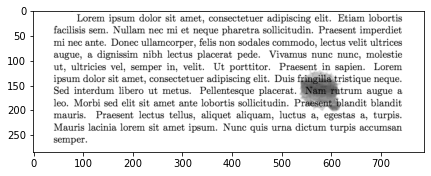

In [28]:
# read image
gray = cv2.imread('../DATA/5.png', 0)
view(gray)

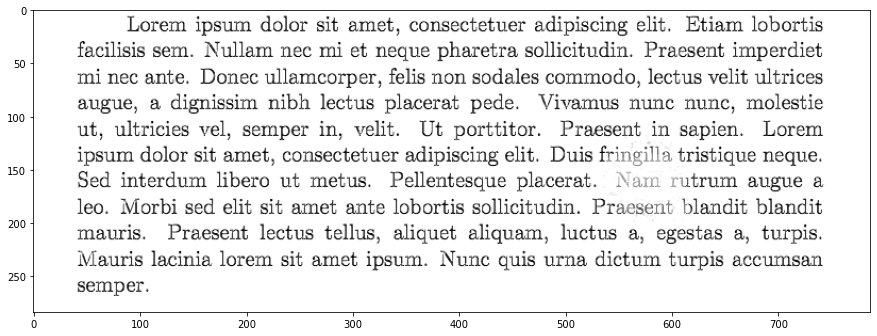

In [203]:
closing = cv_closing(gray, kernel(3, 3))
view(255 - (closing - gray), 15)

### Бинаризация отсечением

In [204]:
def cv_binarization(gray_img, threshold = 150):
    binarized = 1.0 * (gray_img > thresholотсечениемd)
    return binarized

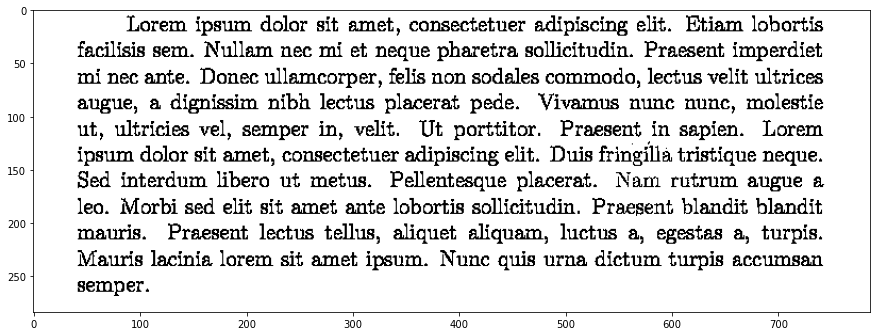

In [221]:
view(cv_binarization(255 - (closing - gray), 222), 15)

### Otsu

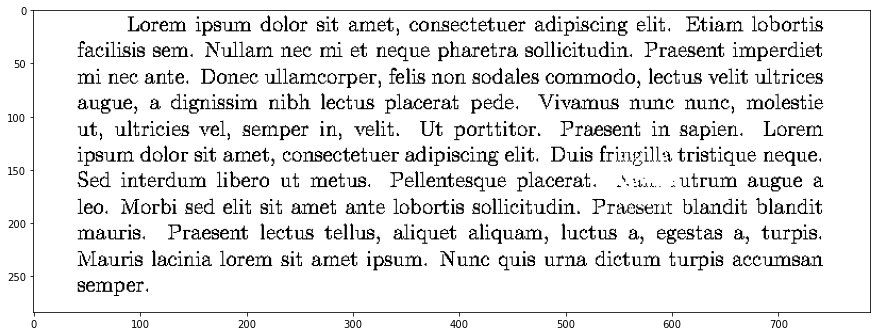

In [206]:
view(otsu(255 - (closing - gray)), 15)